In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve

### Basic exploration and cleaning

In [45]:
df=pd.read_csv('alzheimers_disease_data.csv')

In [46]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [47]:
# display column types
df.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

In [48]:
df.DoctorInCharge.value_counts()

DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64

In [49]:
# dropping patient ID, DoctorInCharge
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [50]:
# null values
df.isna().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

### EDA

<Axes: xlabel='Diagnosis', ylabel='count'>

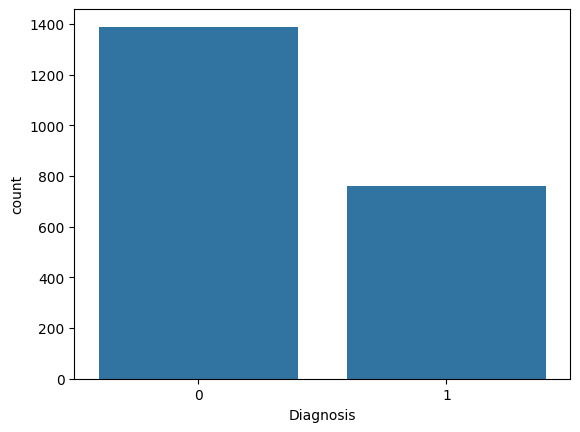

In [51]:
sns.countplot(x='Diagnosis', data=df)

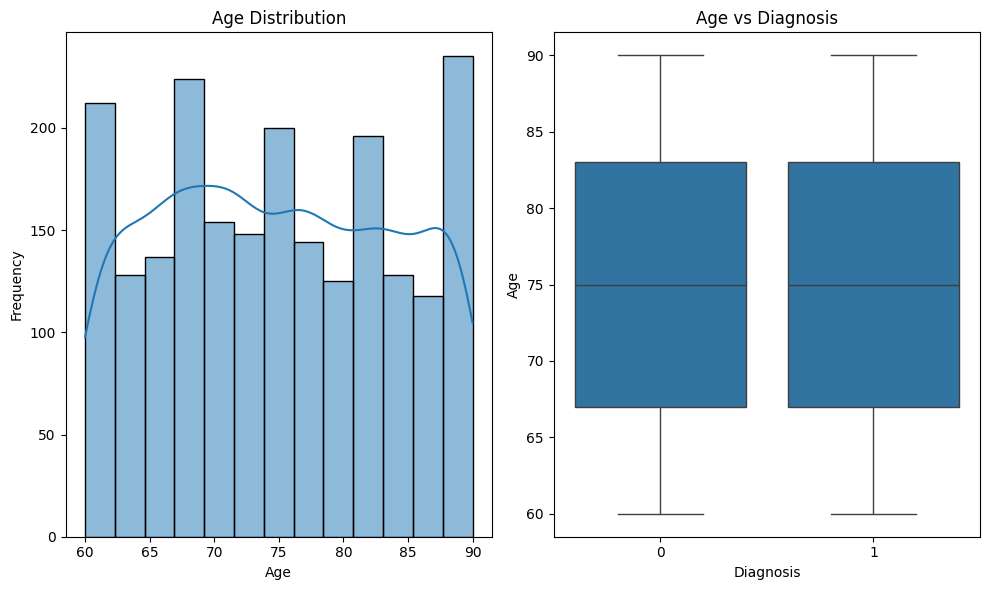

In [52]:
# Age vs Diagnosis
plt.figure(figsize=(10, 6))
# subplot 1
plt.subplot(1, 2, 1)
sns.histplot(df.Age, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
# subplot 2
plt.subplot(1, 2, 2)
sns.boxplot(x='Diagnosis', y='Age', data=df)
plt.title('Age vs Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


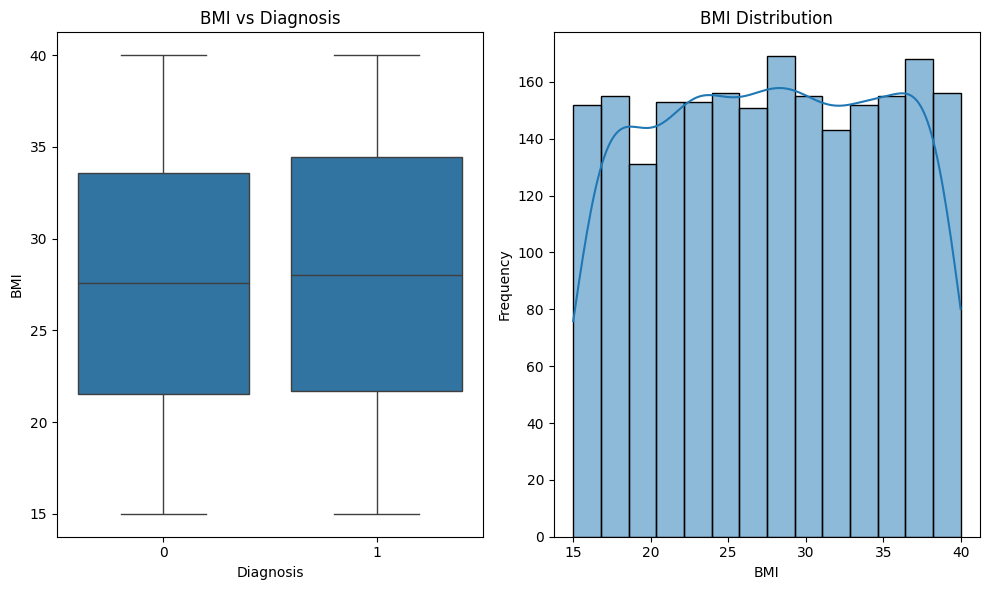

In [53]:
# BMI vs Diagnosis
plt.figure(figsize=(10, 6))
# subplot 1
plt.subplot(1, 2, 1)
sns.boxplot(x='Diagnosis', y='BMI', data=df)
plt.title('BMI vs Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('BMI')
# subplot 2
plt.subplot(1, 2, 2)
sns.histplot(df.BMI, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

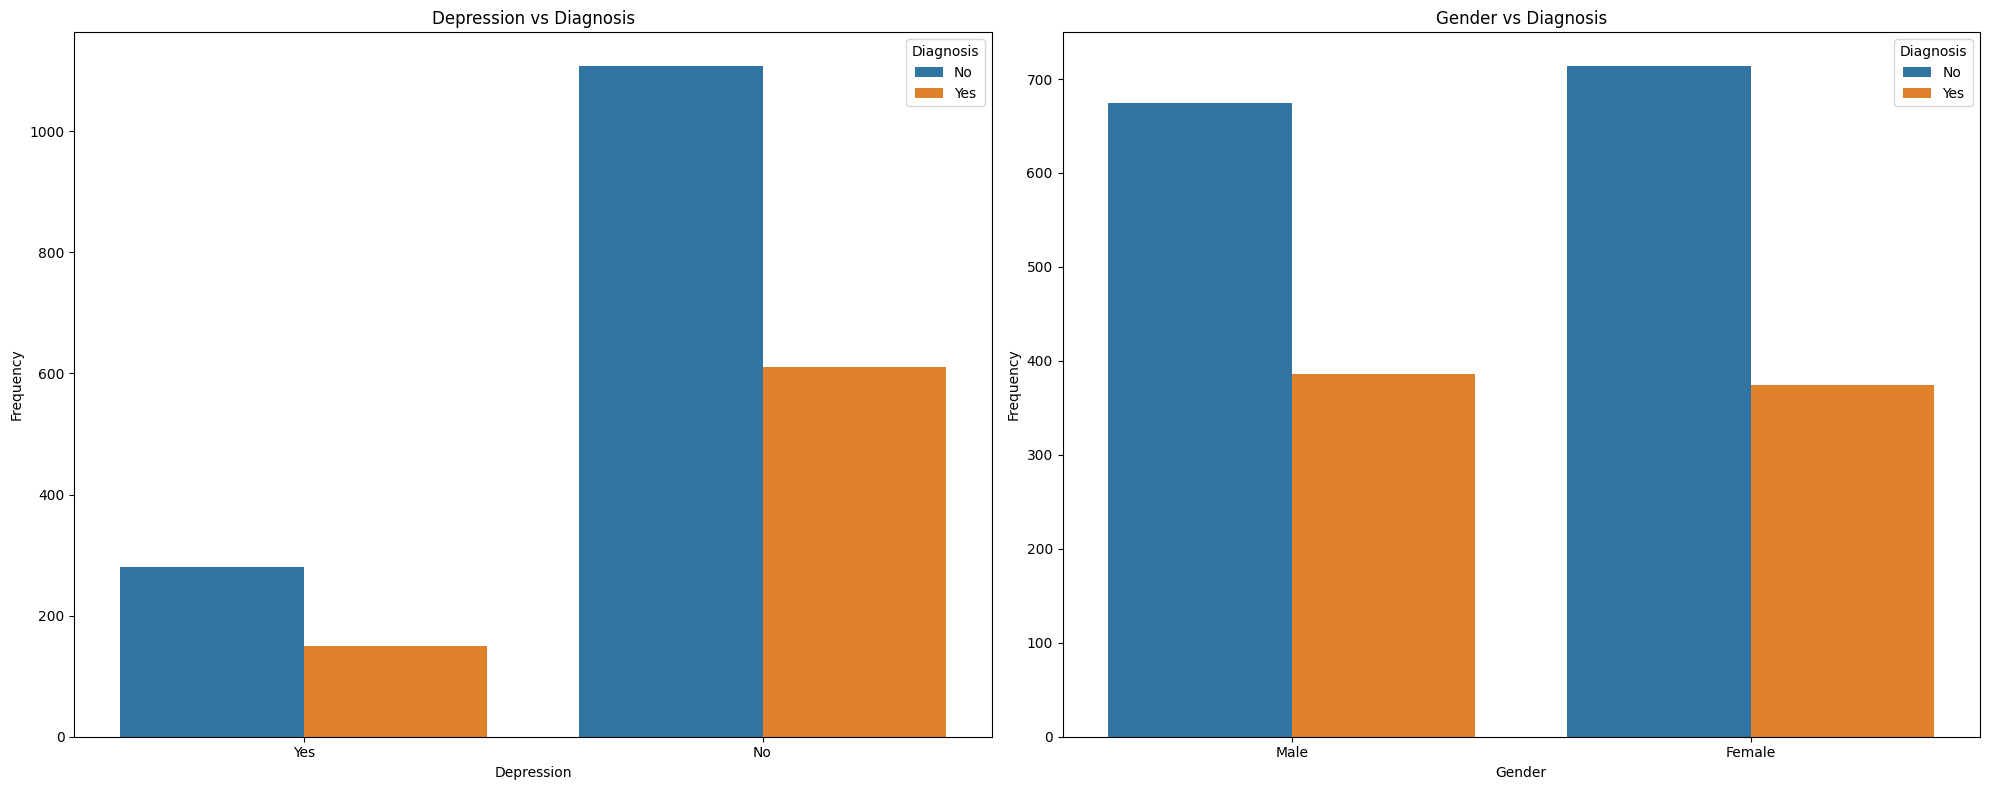

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create sample data (replace this with your actual DataFrame)
df_dep = df[['Depression', 'Diagnosis']].copy()  # Make an explicit copy of the dataframe
# Convert 0.0 to 'No' and 1.0 to 'Yes'
df_dep['Depression'] = df_dep['Depression'].astype(str).apply(lambda x: 'Yes' if x == '1' else 'No')
df_dep['Diagnosis'] = df_dep['Diagnosis'].astype(str).apply(lambda x: 'Yes' if x == '1' else 'No')

df_gen = df[['Gender', 'Diagnosis']].copy()  # Make an explicit copy of the dataframe
# Convert 0.0 to 'Male' and 1.0 to 'Female'
df_gen['Gender'] = df_gen['Gender'].astype(str).apply(lambda x: 'Male' if x == '0' else 'Female')
df_gen['Diagnosis'] = df_gen['Diagnosis'].astype(str).apply(lambda x: 'Yes' if x == '1' else 'No')

# Create a figure to hold the subplots
plt.figure(figsize=(20, 8))

# Subplot 1: Depression vs Diagnosis
plt.subplot(1, 2, 1)
sns.countplot(x='Depression', hue='Diagnosis', data=df_dep)
plt.title('Depression vs Diagnosis')
plt.xlabel('Depression')
plt.ylabel('Frequency')

# Subplot 2: Gender vs Diagnosis
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', hue='Diagnosis', data=df_gen)
plt.title('Gender vs Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots side by side
plt.show()


All these charts don't tell much except that there is an imbalance in Diagnosis column.

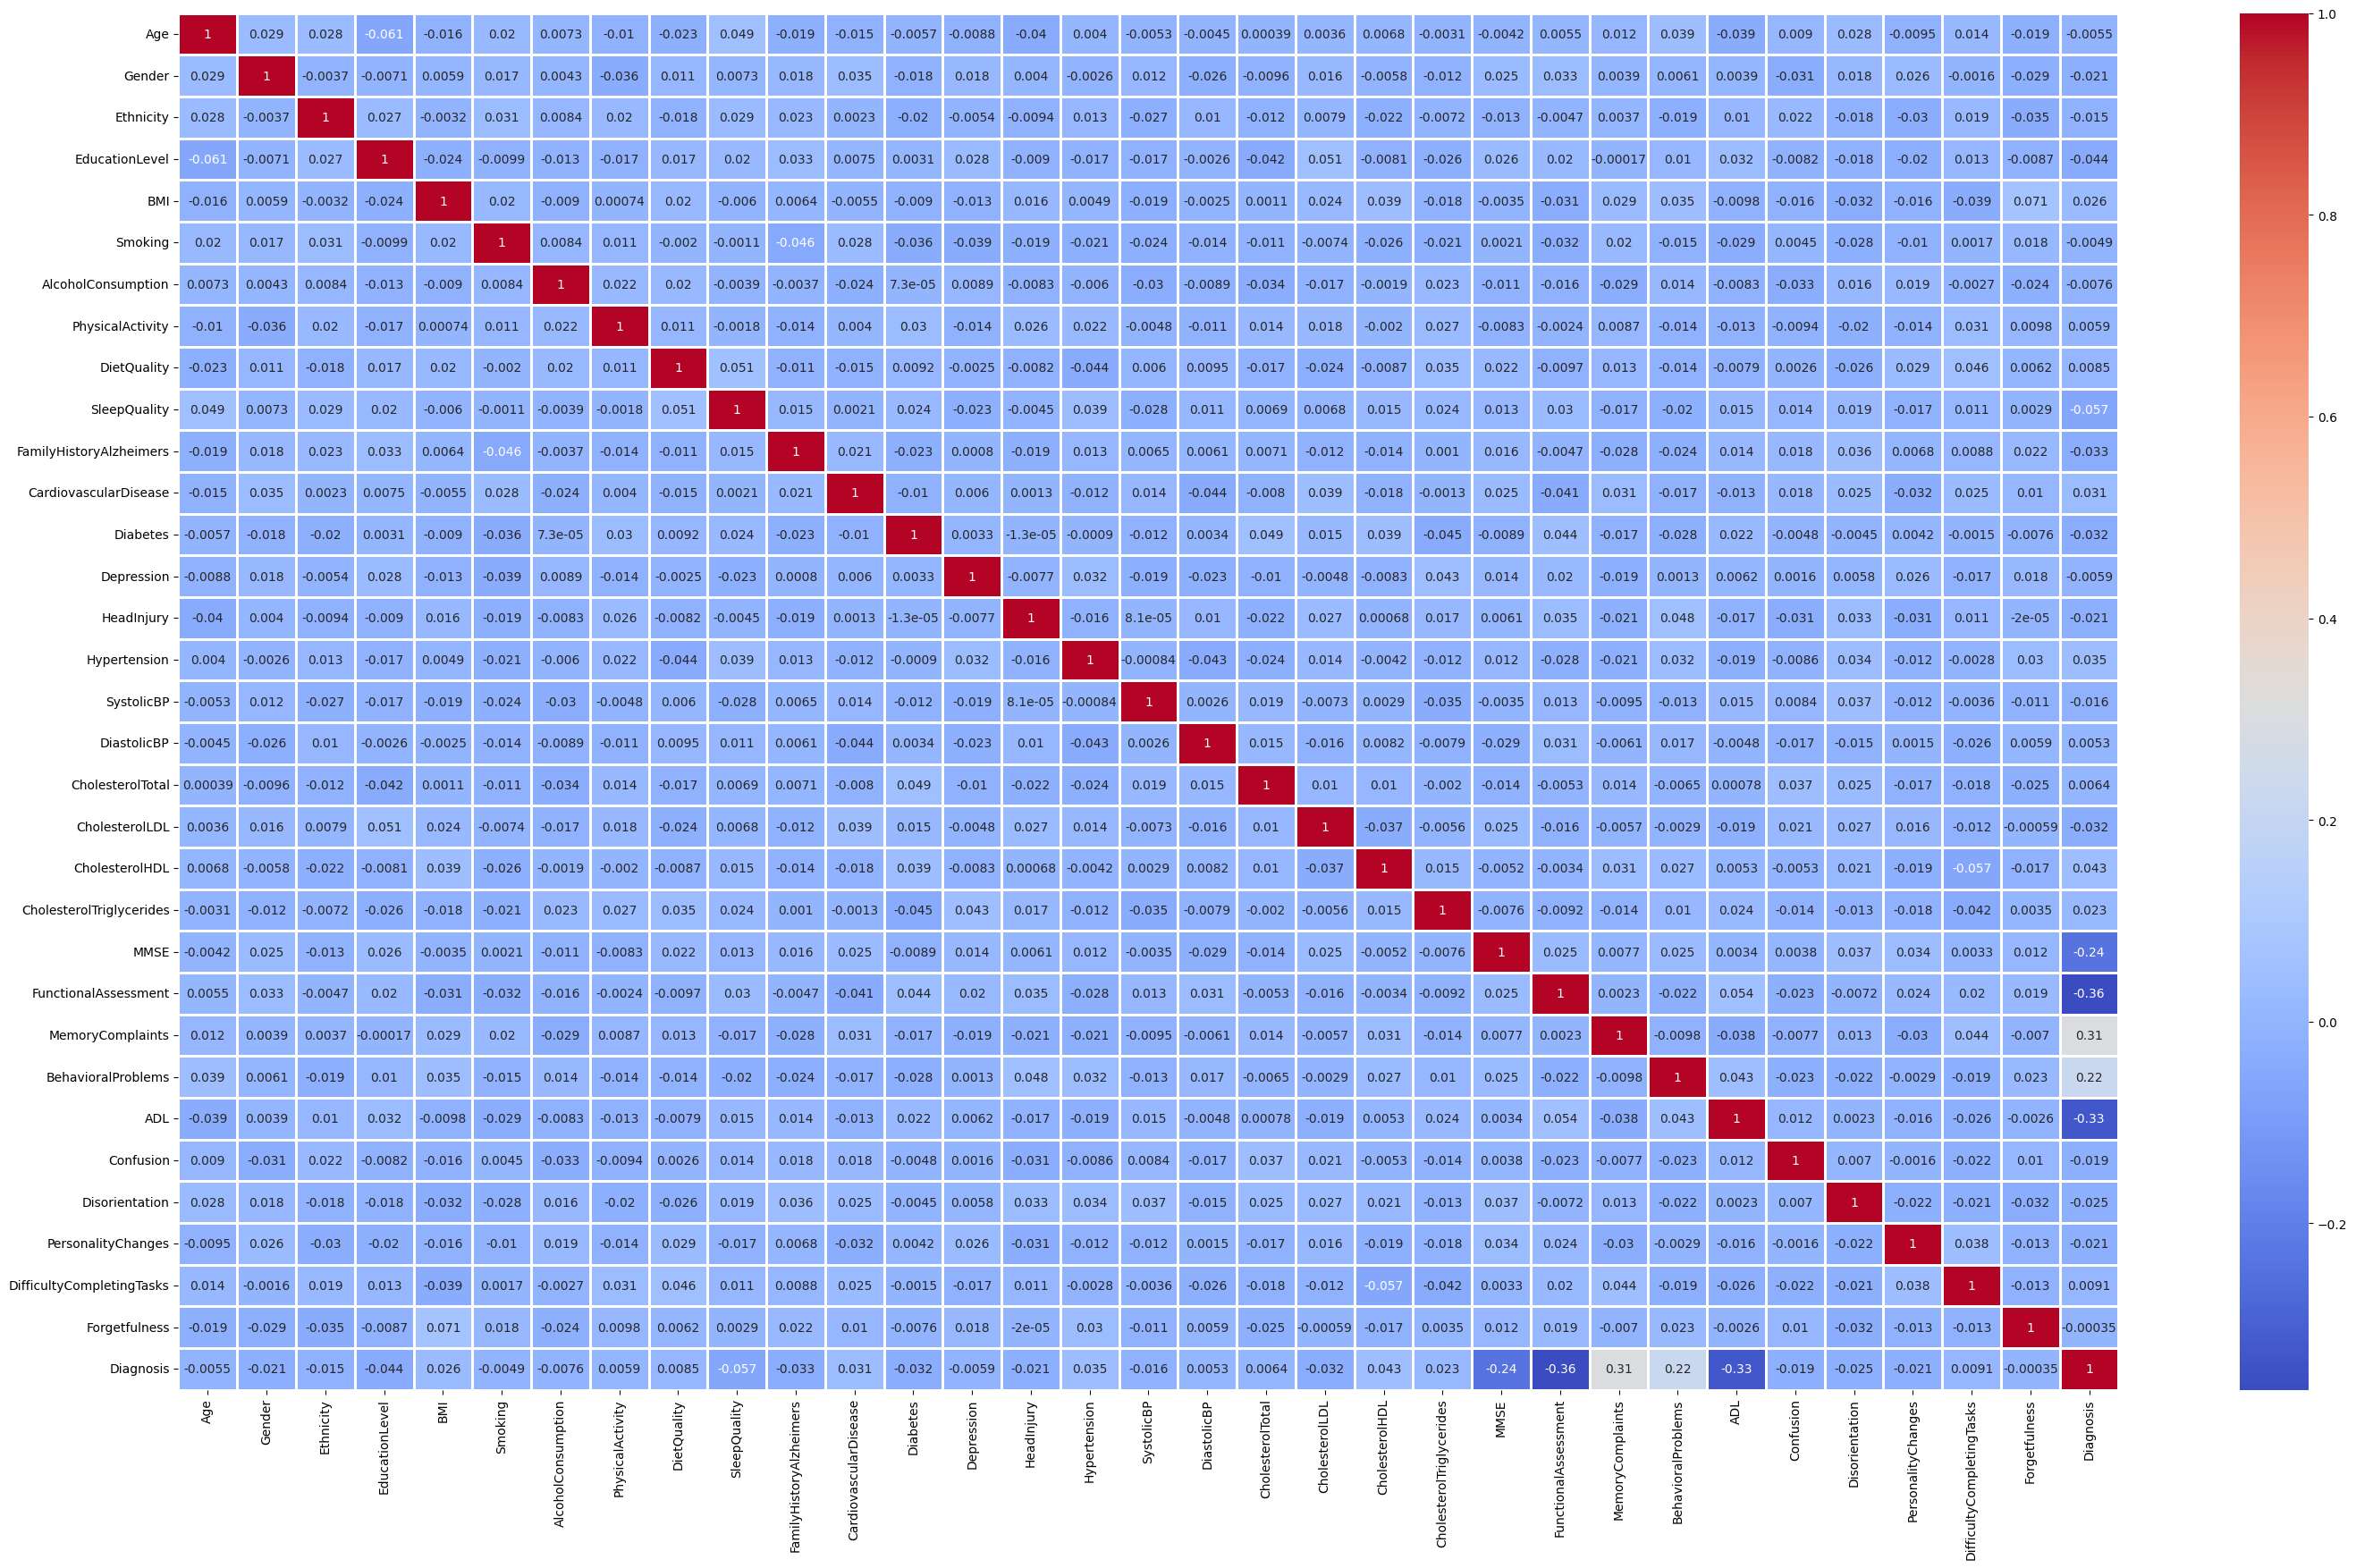

In [55]:
plt.figure(figsize=(35,20))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm',linewidths=2)
plt.show()

In [56]:
df.corr()['Diagnosis'].sort_values(ascending=False)


Diagnosis                    1.000000
MemoryComplaints             0.306742
BehavioralProblems           0.224350
CholesterolHDL               0.042584
Hypertension                 0.035080
CardiovascularDisease        0.031490
BMI                          0.026343
CholesterolTriglycerides     0.022672
DifficultyCompletingTasks    0.009069
DietQuality                  0.008506
CholesterolTotal             0.006394
PhysicalActivity             0.005945
DiastolicBP                  0.005293
Forgetfulness               -0.000354
Smoking                     -0.004865
Age                         -0.005488
Depression                  -0.005893
AlcoholConsumption          -0.007618
Ethnicity                   -0.014782
SystolicBP                  -0.015615
Confusion                   -0.019186
PersonalityChanges          -0.020627
Gender                      -0.020975
HeadInjury                  -0.021411
Disorientation              -0.024648
Diabetes                    -0.031508
CholesterolL

From this we can see that the attributes at the top and bottom of the list actually have some affect on Diagnosis.

In [57]:
df_subset=df[['FunctionalAssessment','ADL','MMSE', 'MemoryComplaints', 'BehavioralProblems','Diagnosis']]

<Axes: >

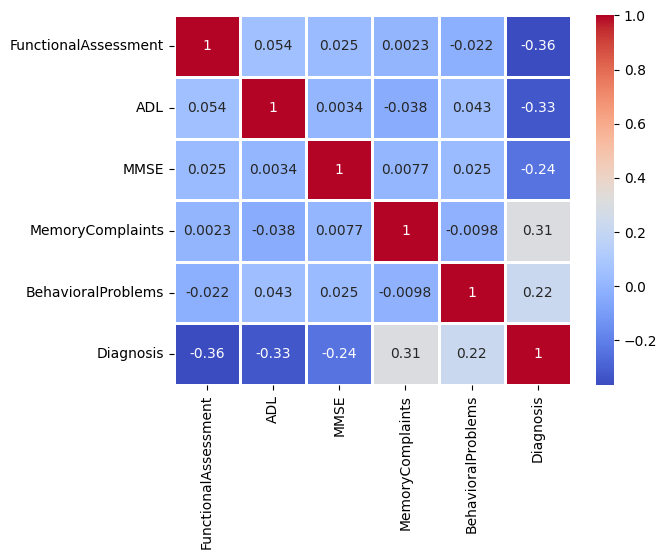

In [58]:
sns.heatmap(df_subset.corr(),annot = True,cmap='coolwarm',linewidths=2)

Text(0.5, 1.0, 'Memory Complaints vs Diagnosis')

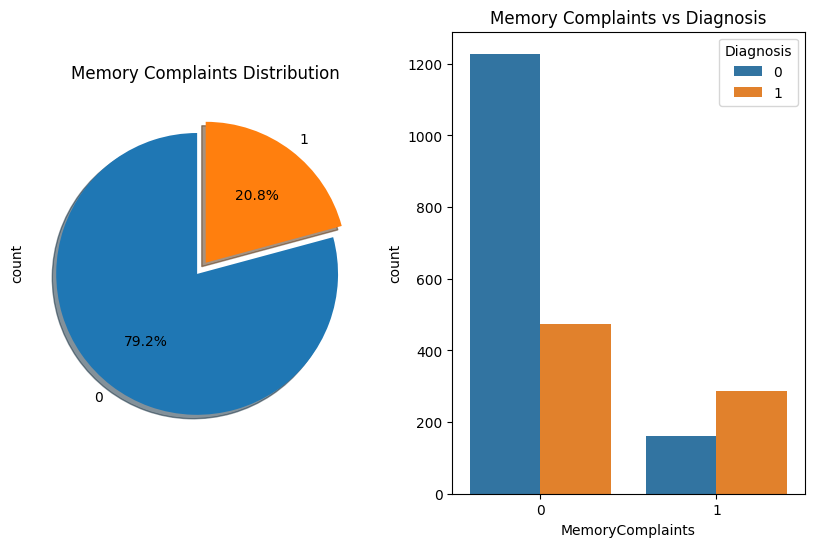

In [59]:
# pie chart
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
df.MemoryComplaints.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.1, 0], shadow=True)
plt.title('Memory Complaints Distribution')
# countplot
plt.subplot(1, 2, 2)
sns.countplot(x='MemoryComplaints', hue='Diagnosis',data=df)
plt.title('Memory Complaints vs Diagnosis')


Text(0.5, 1.0, 'Behavioral Problems vs Diagnosis')

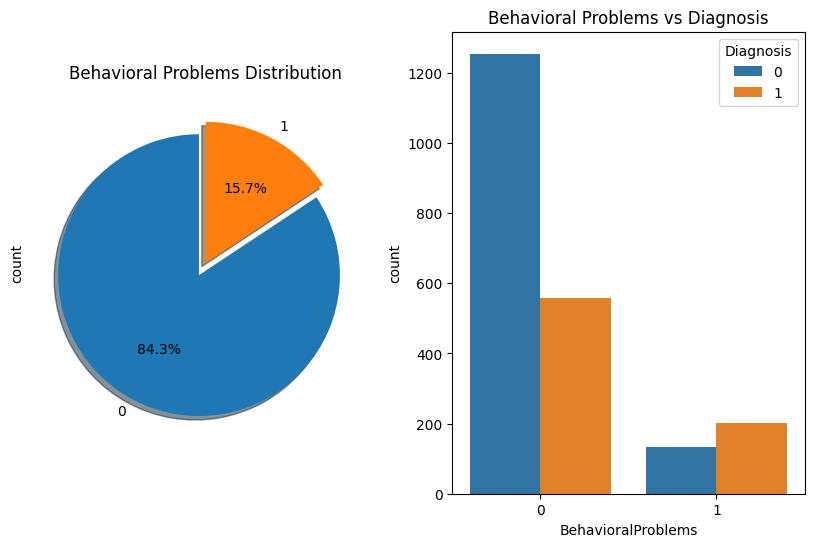

In [60]:
# pie chart
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
df.BehavioralProblems.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.1, 0], shadow=True)
plt.title('Behavioral Problems Distribution')
# countplot
plt.subplot(1, 2, 2)
sns.countplot(x='BehavioralProblems', hue='Diagnosis',data=df)
plt.title('Behavioral Problems vs Diagnosis')


In [61]:
df_subset.head()

,FunctionalAssessment,ADL,MMSE,MemoryComplaints,BehavioralProblems,Diagnosis
0,6.518877,1.725883,21.463532,0,0,0
1,7.118696,2.592424,20.613267,0,0,0
2,5.895077,7.119548,7.356249,0,0,0
3,8.965106,6.481226,13.991127,0,1,0
4,6.045039,0.014691,13.517609,0,0,0


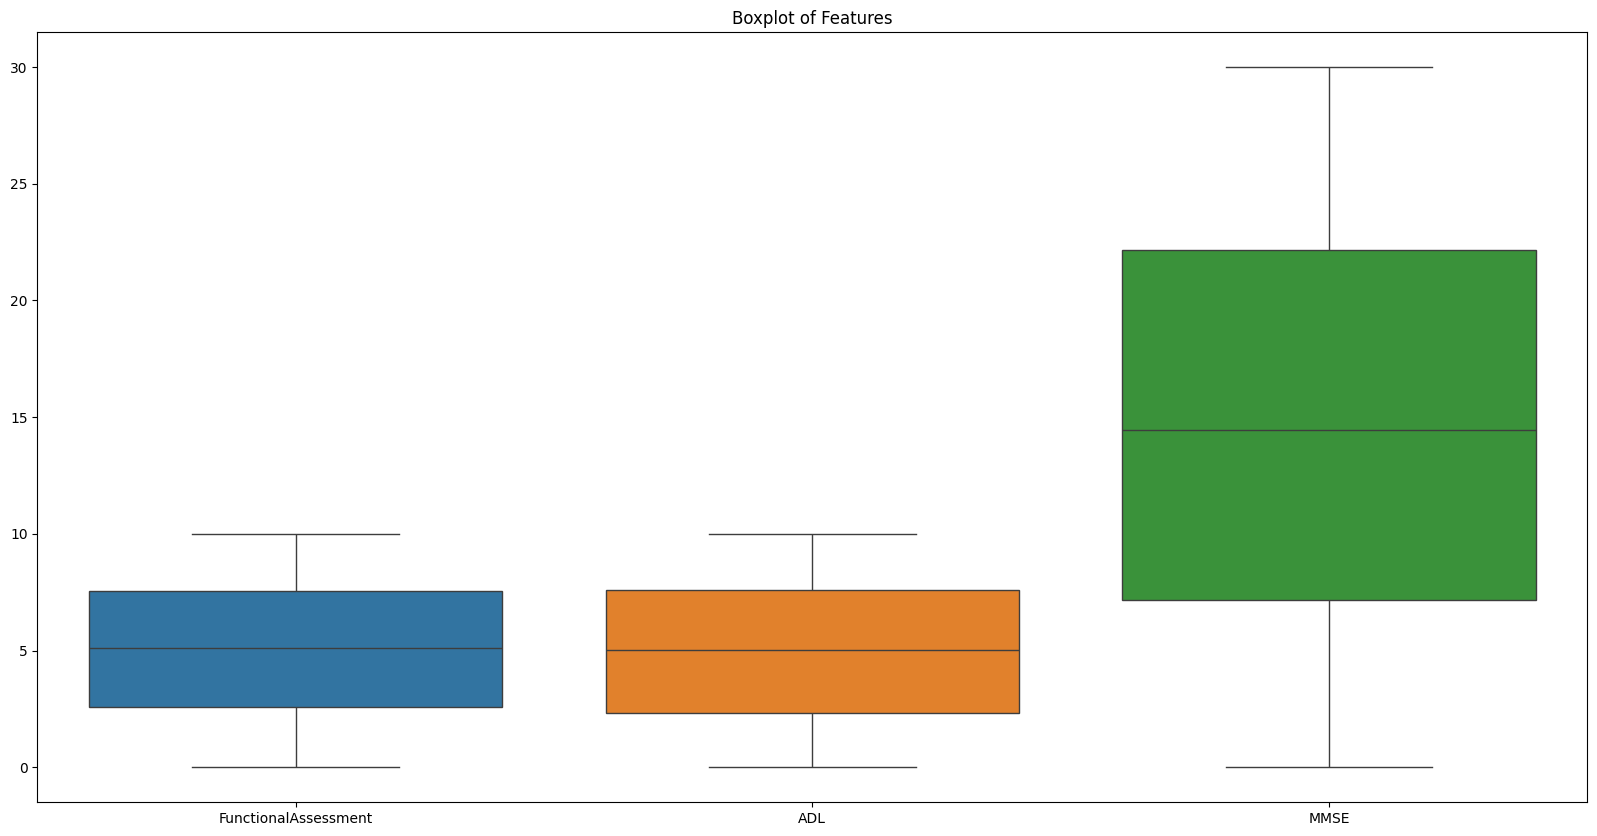

In [62]:
# boxplot to find outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_subset[['FunctionalAssessment','ADL','MMSE']])
plt.title('Boxplot of Features')
plt.show()


No outliers.

## Split dataset

In [63]:
# split the dataset
X = df_subset.drop('Diagnosis', axis=1)
y = df_subset['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)


In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1719, 5), (430, 5), (1719,), (430,))

In [65]:
y_train.value_counts()

Diagnosis
0    1112
1     607
Name: count, dtype: int64

RandomOverSampling duplicates rows which can cause overfitting. We can either use SMOTE or Ensemble or tree based models which can handle imbalanced dataset. 

In [66]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [67]:
y_train_resampled.value_counts()

Diagnosis
0    1112
1    1112
Name: count, dtype: int64

## Training

- Logistic Regression
- Decision Tree
- Random Forest
- Boosting
    - Adaboost
    - Catboost
    - XGBoost
    - Gradient Boosting
- Bagging

In [68]:
result_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

In [69]:
def metrics(y_true, y_pred, model):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred)
    print('Classification Report:')
    print(classification_report(y_true, y_pred))
    print('Accuracy:', acc)
    print('Precision:', prec)
    print('Recall:', rec)
    print('F1 Score:', f1)
    print('ROC AUC Score:', roc_auc)

    return acc, prec, rec, f1, roc_auc, fpr, tpr

def plot_curve_mat(fpr, tpr, y_true, y_pred):
    # plot ROC curve
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    # plot confusion matrix
    plt.subplot(1, 2, 2)
    confusion_mat=confusion_matrix(y_true, y_pred)
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       277
           1       0.73      0.83      0.77       153

    accuracy                           0.83       430
   macro avg       0.81      0.83      0.82       430
weighted avg       0.84      0.83      0.83       430

Accuracy: 0.827906976744186
Precision: 0.7257142857142858
Recall: 0.8300653594771242
F1 Score: 0.774390243902439
ROC AUC Score: 0.8283900804605838


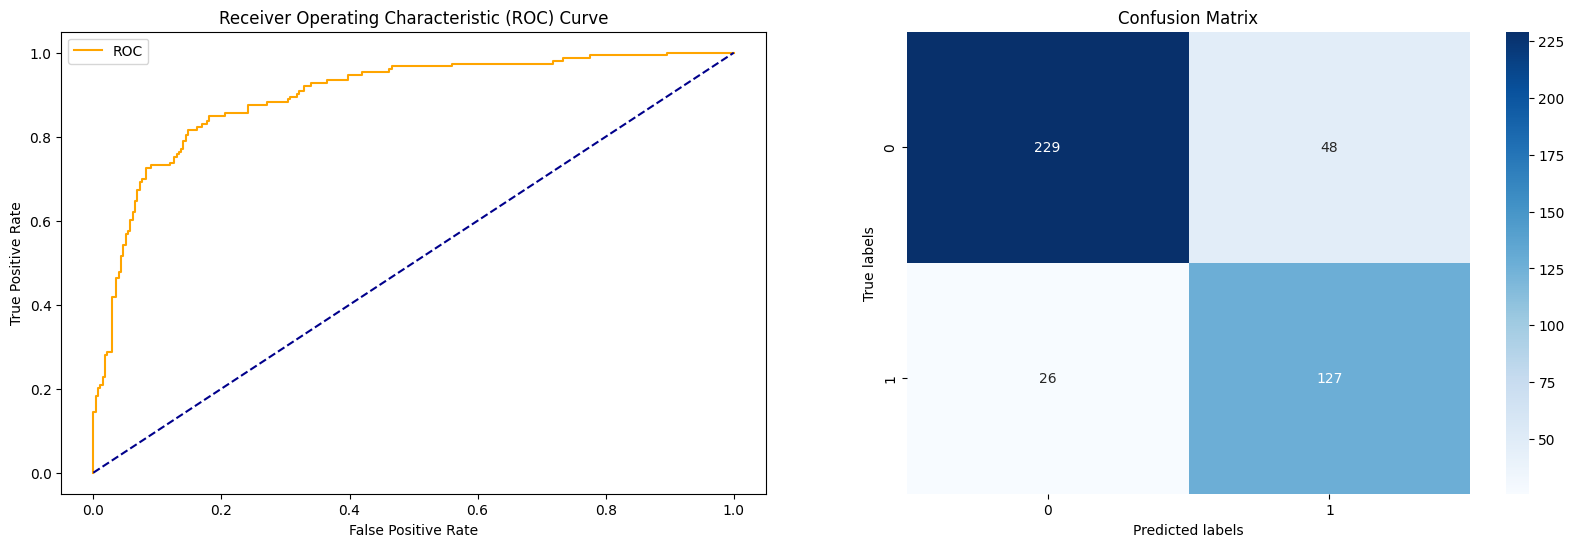

In [70]:
# Logistic regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)
y_pred = logreg.predict(X_test)

acc, prec, rec, f1, roc_auc, fpr, tpr = metrics(y_test, y_pred, logreg)
plot_curve_mat(fpr, tpr, y_test, y_pred)

result_df.loc[len(result_df)] = ['Logistic Regression', acc, prec, rec, f1, roc_auc]


In [71]:
# explore coefficients of the model
coef = logreg.coef_[0]
intercept = logreg.intercept_[0]
print('Intercept:', intercept)
cof=dict(zip(X.columns, coef))
sort_cof=sorted(cof.items(), key=lambda x: x[1], reverse=True)
print('Sorted Coefficients:', sort_cof)

Intercept: 4.372990041321083
Sorted Coefficients: [('MemoryComplaints', 2.1013331007794807), ('BehavioralProblems', 1.8243949908829813), ('MMSE', -0.09202910216160733), ('ADL', -0.3943765175750844), ('FunctionalAssessment', -0.4246468410441418)]


Applying on un-resampled data

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       277
           1       0.80      0.72      0.76       153

    accuracy                           0.83       430
   macro avg       0.82      0.81      0.82       430
weighted avg       0.83      0.83      0.83       430

Accuracy: 0.8348837209302326
Precision: 0.7971014492753623
Recall: 0.7189542483660131
F1 Score: 0.7560137457044673
ROC AUC Score: 0.8089356079375193


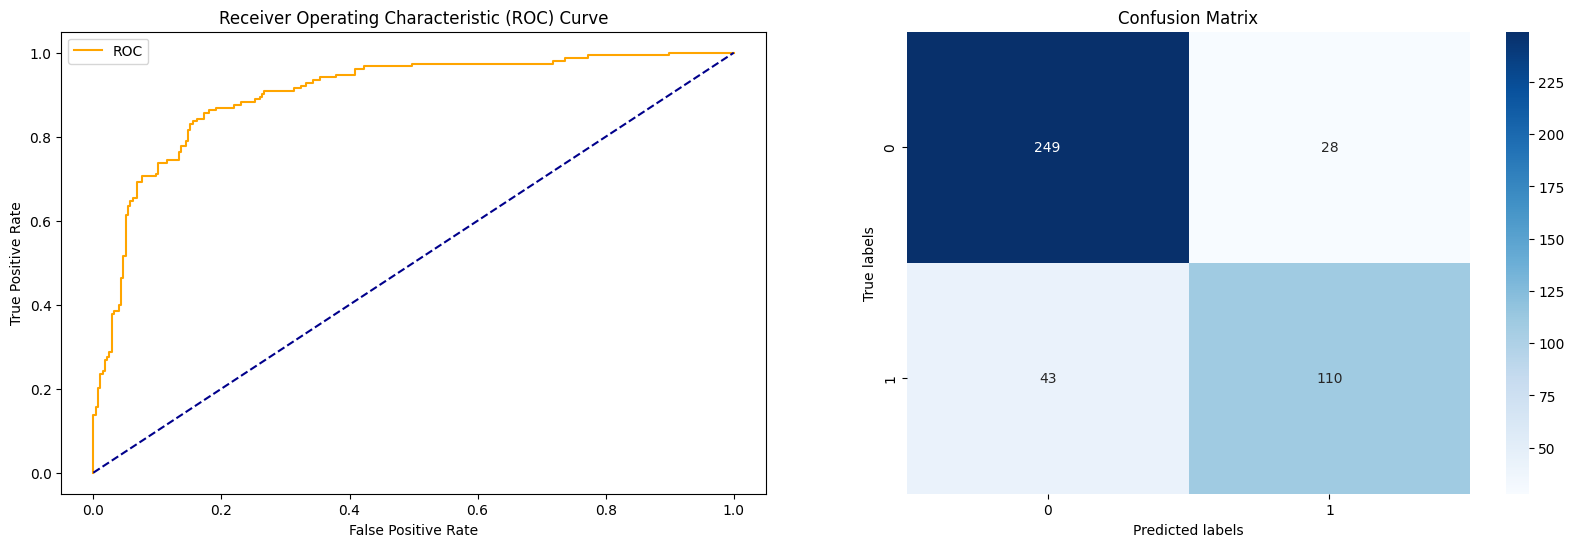

In [72]:
# un-resampled model
logreg_unresampled = LogisticRegression(random_state=42)
logreg_unresampled.fit(X_train, y_train)
y_pred_unresampled = logreg_unresampled.predict(X_test)

acc_unresampled, prec_unresampled, rec_unresampled, f1_unresampled, roc_auc_unresampled, fpr_unresampled, tpr_unresampled = metrics(y_test, y_pred_unresampled, logreg_unresampled)
plot_curve_mat(fpr_unresampled, tpr_unresampled, y_test, y_pred_unresampled)

result_df.loc[len(result_df)] = ['Logistic Regression Unsampled', acc_unresampled, prec_unresampled, rec_unresampled, f1_unresampled, roc_auc_unresampled]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       277
           1       0.82      0.88      0.85       153

    accuracy                           0.89       430
   macro avg       0.88      0.89      0.88       430
weighted avg       0.89      0.89      0.89       430

Accuracy: 0.8883720930232558
Precision: 0.8181818181818182
Recall: 0.8823529411764706
F1 Score: 0.8490566037735849
ROC AUC Score: 0.8870248460394988


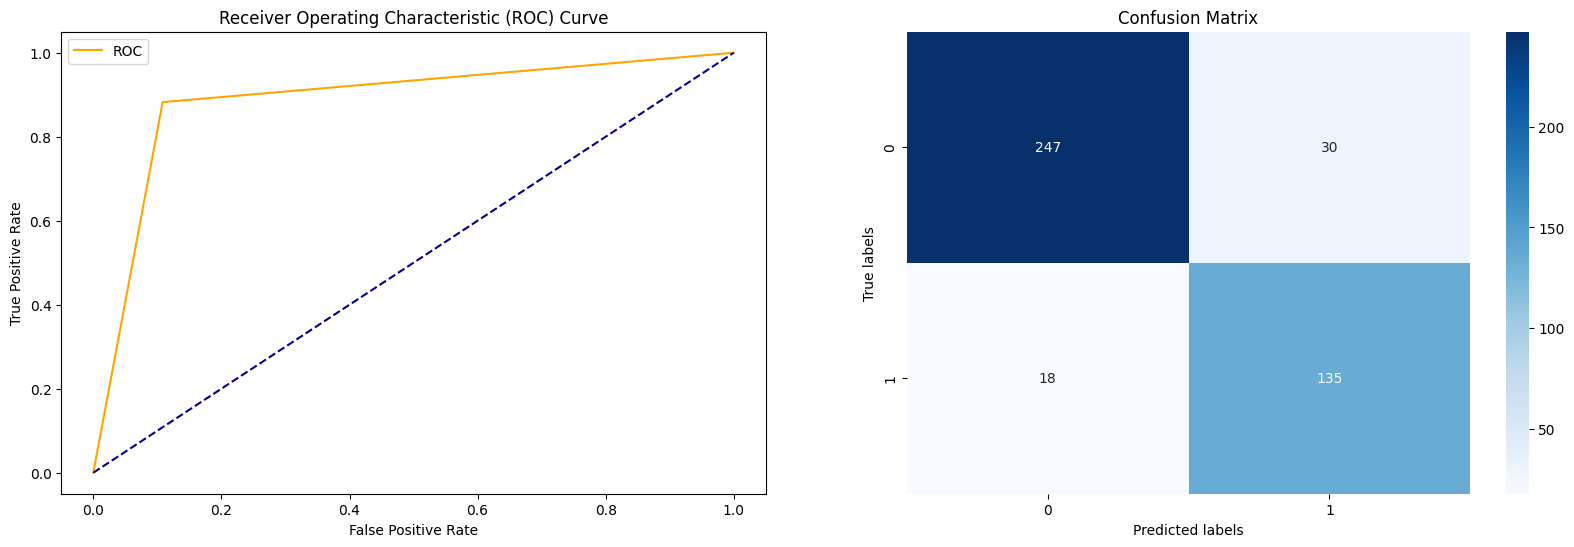

In [73]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)
y_pred = dt.predict(X_test)

acc, prec, rec, f1, roc_auc, fpr, tpr = metrics(y_test, y_pred, dt)
plot_curve_mat(fpr, tpr, y_test, y_pred)

result_df.loc[len(result_df)] = ['Decision Tree', acc, prec, rec, f1, roc_auc]


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       277
           1       0.95      0.92      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.95      0.95      0.95       430

Accuracy: 0.9534883720930233
Precision: 0.9463087248322147
Recall: 0.9215686274509803
F1 Score: 0.9337748344370861
ROC AUC Score: 0.9463438805124937


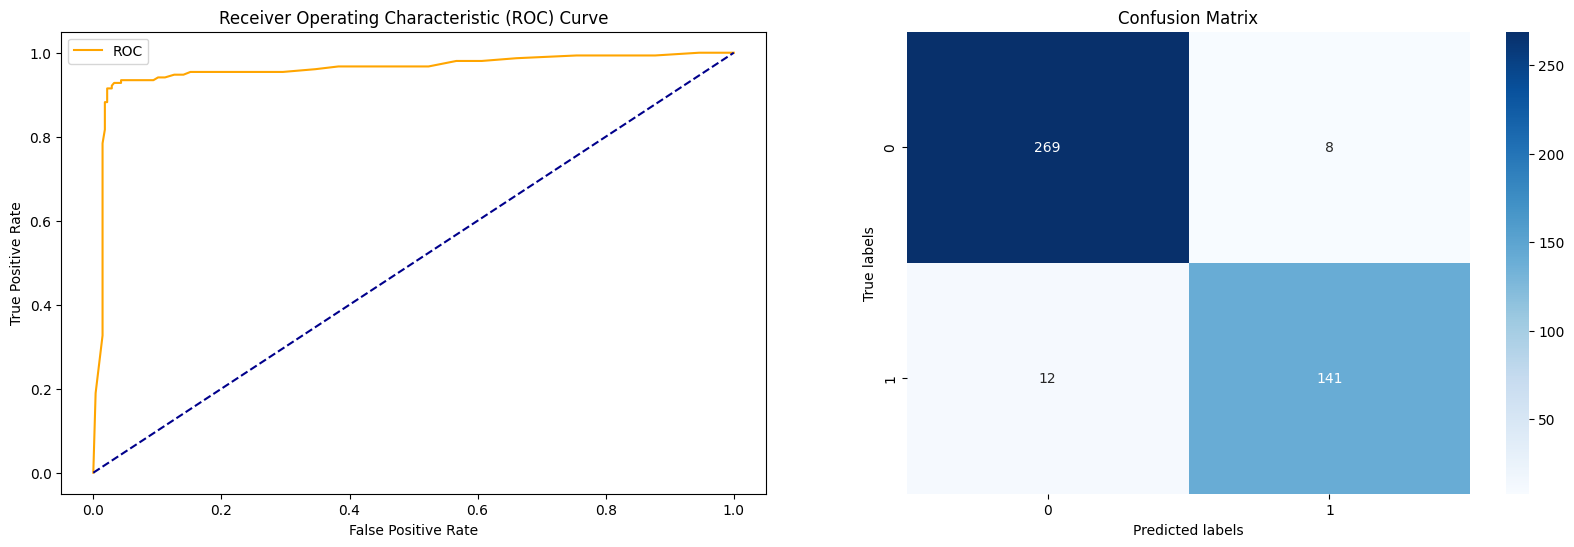

In [74]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred = rf.predict(X_test)

acc, prec, rec, f1, roc_auc, fpr, tpr = metrics(y_test, y_pred, rf)
plot_curve_mat(fpr, tpr, y_test, y_pred)

result_df.loc[len(result_df)] = ['Random Forest', acc, prec, rec, f1, roc_auc]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       277
           1       0.91      0.94      0.92       153

    accuracy                           0.94       430
   macro avg       0.94      0.94      0.94       430
weighted avg       0.95      0.94      0.94       430

Accuracy: 0.9441860465116279
Precision: 0.9056603773584906
Recall: 0.9411764705882353
F1 Score: 0.9230769230769231
ROC AUC Score: 0.9435124230197495


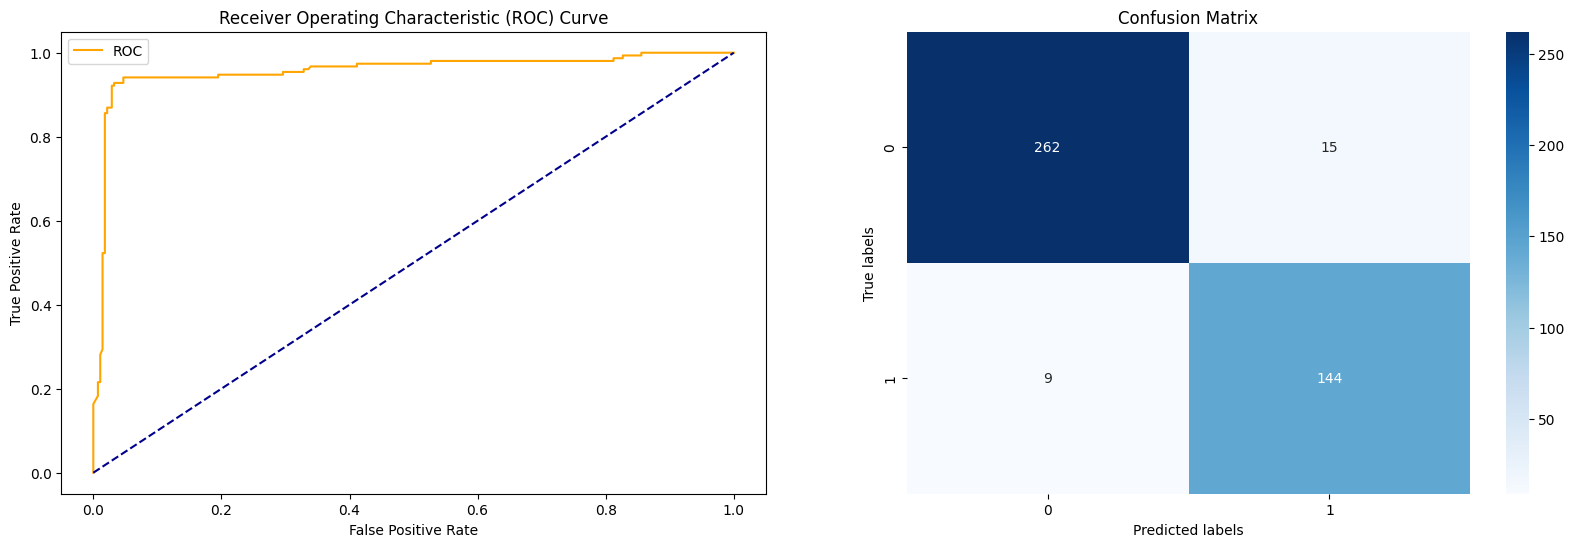

In [75]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_resampled, y_train_resampled)
y_pred = gb.predict(X_test)

acc, prec, rec, f1, roc_auc, fpr, tpr = metrics(y_test, y_pred, gb)
plot_curve_mat(fpr, tpr, y_test, y_pred)

result_df.loc[len(result_df)] = ['Gradient Boosting', acc, prec, rec, f1, roc_auc]

d:\important\2024\ML-zoomcamp-midterm\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       277
           1       0.81      0.93      0.87       153

    accuracy                           0.90       430
   macro avg       0.88      0.90      0.89       430
weighted avg       0.91      0.90      0.90       430

Accuracy: 0.8976744186046511
Precision: 0.8114285714285714
Recall: 0.9281045751633987
F1 Score: 0.8658536585365854
ROC AUC Score: 0.9044855005780892


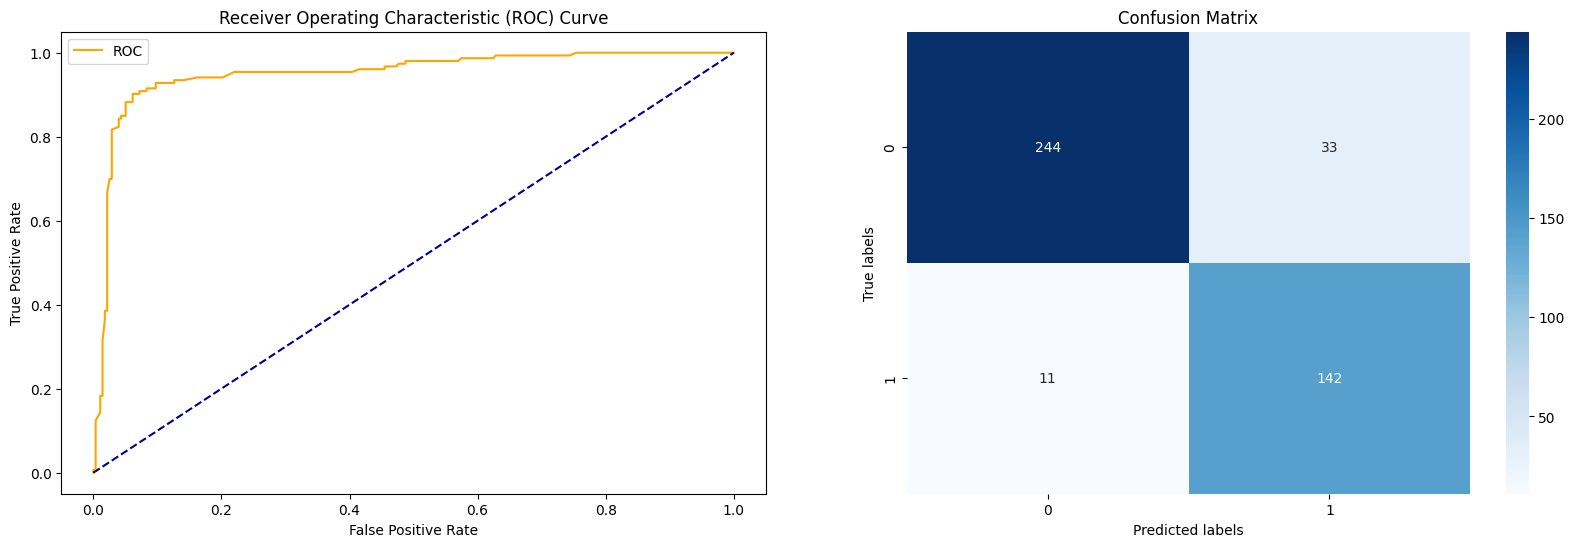

In [76]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train_resampled, y_train_resampled)
y_pred = ab.predict(X_test)

acc, prec, rec, f1, roc_auc, fpr, tpr = metrics(y_test, y_pred, ab)
plot_curve_mat(fpr, tpr, y_test, y_pred)

result_df.loc[len(result_df)] = ['AdaBoost', acc, prec, rec, f1, roc_auc]

In [77]:
# Trying standard scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler_min_max = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

X_train_min_max = scaler_min_max.fit_transform(X_train_resampled)
X_test_min_max = scaler_min_max.transform(X_test)

# Logistic regression
def model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc, prec, rec, f1, roc_auc, fpr, tpr = metrics(y_test, y_pred, model)
    plot_curve_mat(fpr, tpr, y_test, y_pred)
    return acc, prec, rec, f1, roc_auc

Standard Scaled: logreg
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       277
           1       0.73      0.83      0.78       153

    accuracy                           0.83       430
   macro avg       0.81      0.83      0.82       430
weighted avg       0.84      0.83      0.83       430

Accuracy: 0.8302325581395349
Precision: 0.7298850574712644
Recall: 0.8300653594771242
F1 Score: 0.7767584097859327
ROC AUC Score: 0.8301951346122084


d:\important\2024\ML-zoomcamp-midterm\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


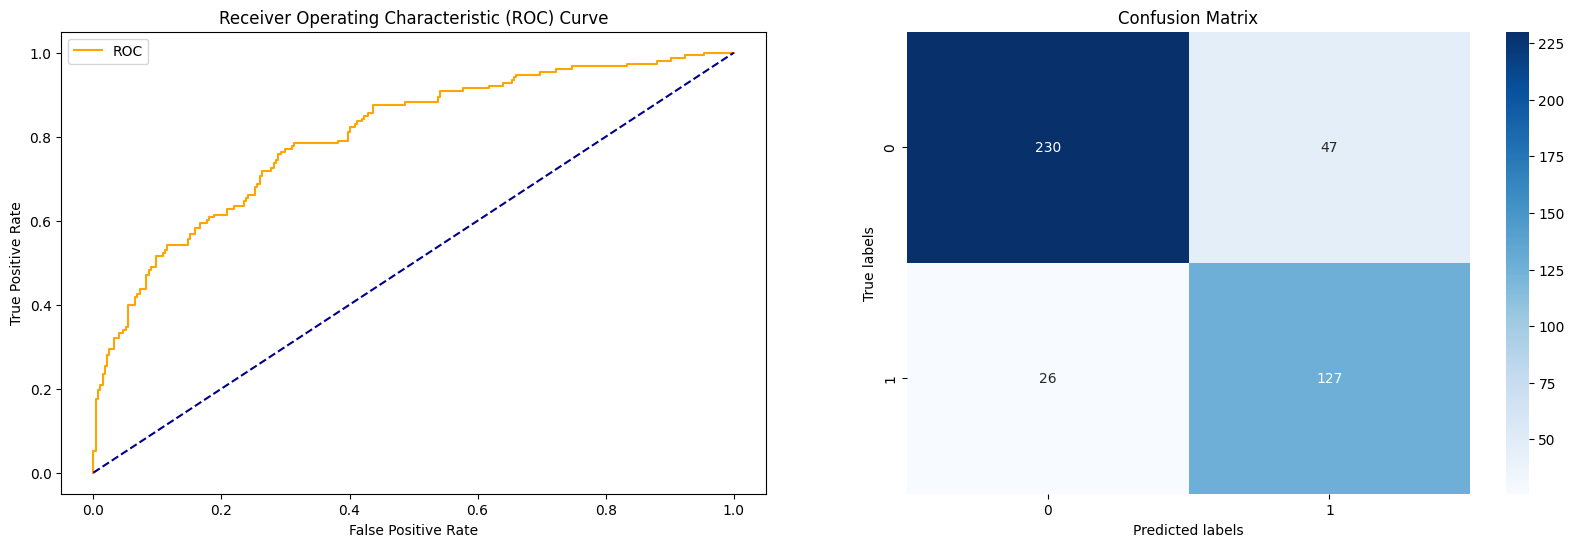

Min Max Scaled: logreg
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       277
           1       0.73      0.84      0.78       153

    accuracy                           0.83       430
   macro avg       0.82      0.83      0.82       430
weighted avg       0.84      0.83      0.83       430

Accuracy: 0.8325581395348837
Precision: 0.7314285714285714
Recall: 0.8366013071895425
F1 Score: 0.7804878048780488
ROC AUC Score: 0.8334631084684175


d:\important\2024\ML-zoomcamp-midterm\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


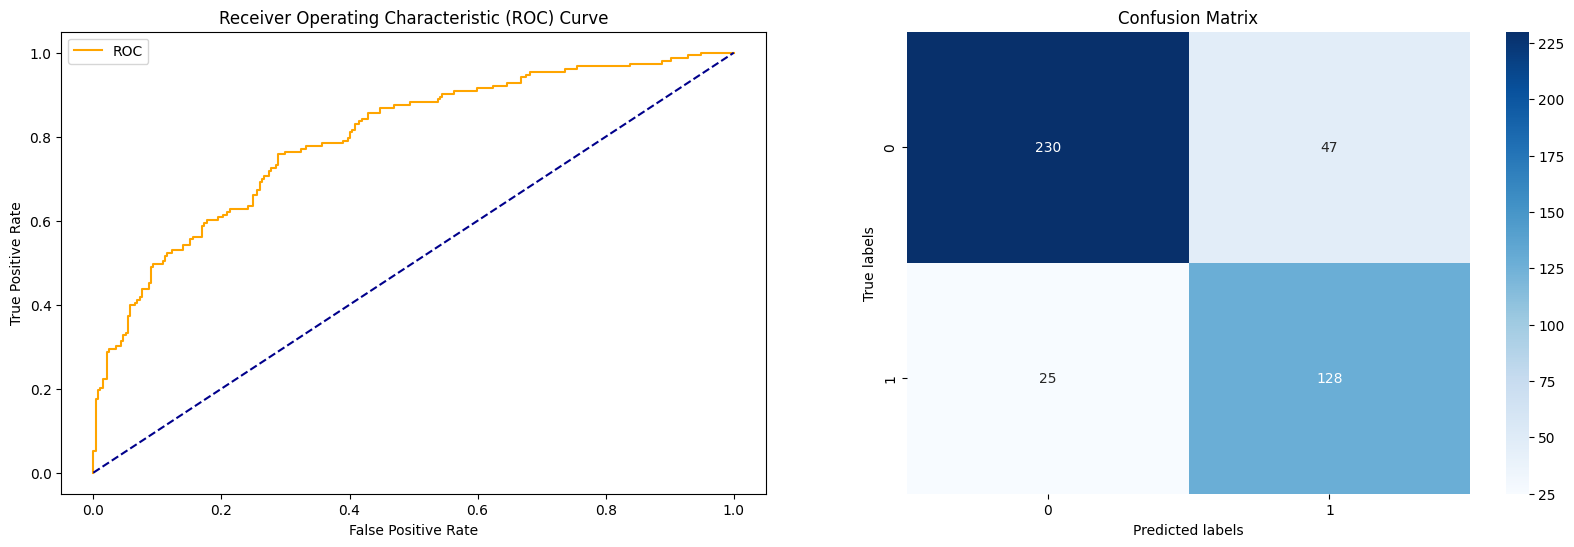

In [78]:
print('Standard Scaled: logreg')
logreg_scaled = LogisticRegression(random_state=42)
acc, prec, rec, f1, roc_auc = model(X_train_scaled, y_train_resampled, X_test_scaled, y_test, logreg_scaled)

print('Min Max Scaled: logreg')
logreg_min_max = LogisticRegression(random_state=42)
acc, prec, rec, f1, roc_auc = model(X_train_min_max, y_train_resampled, X_test_min_max, y_test, logreg_min_max)

result_df.loc[len(result_df)] = ['Logistic Regression Standard Scaled', acc, prec, rec, f1, roc_auc]
result_df.loc[len(result_df)] = ['Logistic Regression Min Max Scaled', acc, prec, rec, f1, roc_auc]

d:\important\2024\ML-zoomcamp-midterm\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       277
           1       0.82      0.88      0.85       153

    accuracy                           0.89       430
   macro avg       0.88      0.89      0.88       430
weighted avg       0.89      0.89      0.89       430

Accuracy: 0.8883720930232558
Precision: 0.8181818181818182
Recall: 0.8823529411764706
F1 Score: 0.8490566037735849
ROC AUC Score: 0.8870248460394988


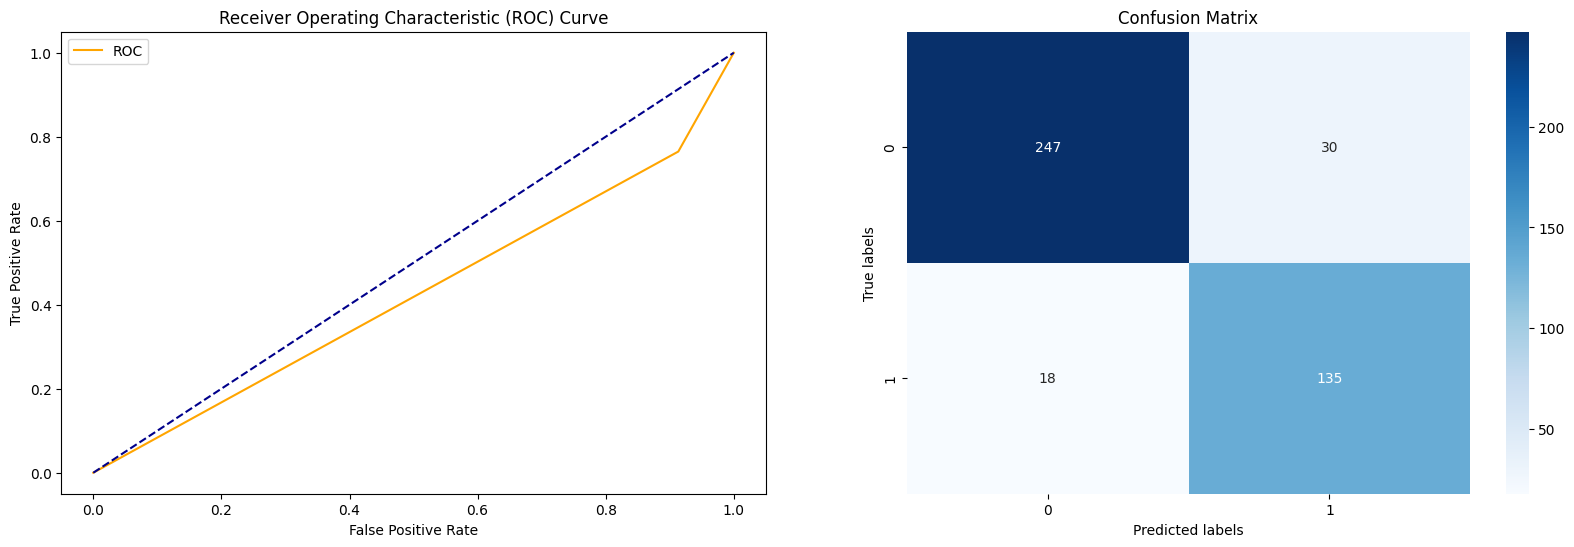

d:\important\2024\ML-zoomcamp-midterm\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       277
           1       0.82      0.88      0.85       153

    accuracy                           0.89       430
   macro avg       0.88      0.89      0.88       430
weighted avg       0.89      0.89      0.89       430

Accuracy: 0.8883720930232558
Precision: 0.8181818181818182
Recall: 0.8823529411764706
F1 Score: 0.8490566037735849
ROC AUC Score: 0.8870248460394988


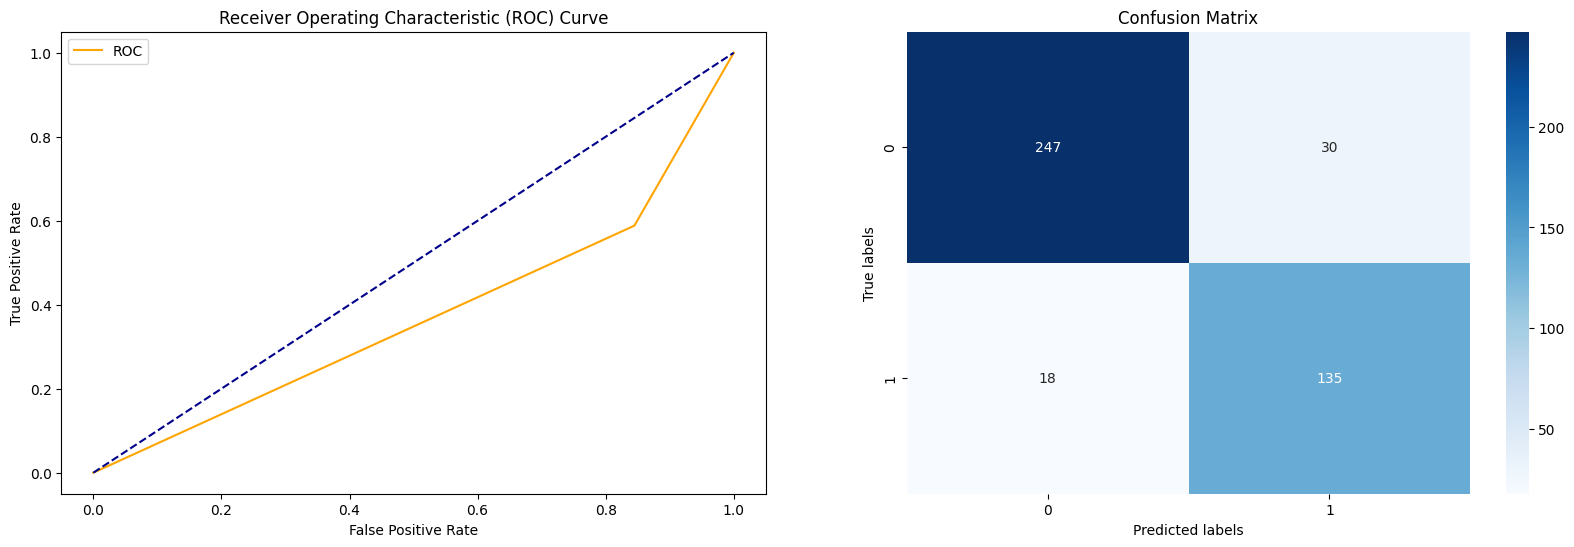

In [79]:
# Decision Tree
dt_scaled = DecisionTreeClassifier(random_state=42)
acc, prec, rec, f1, roc_auc = model(X_train_scaled, y_train_resampled, X_test_scaled, y_test, dt_scaled)

dt_min_max = DecisionTreeClassifier(random_state=42)
acc, prec, rec, f1, roc_auc = model(X_train_min_max, y_train_resampled, X_test_min_max, y_test, dt_min_max)

result_df.loc[len(result_df)] = ['Decision Tree Standard Scaled', acc, prec, rec, f1, roc_auc]
result_df.loc[len(result_df)] = ['Decision Tree Min Max Scaled', acc, prec, rec, f1, roc_auc]

d:\important\2024\ML-zoomcamp-midterm\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       277
           1       0.95      0.92      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.95      0.95      0.95       430

Accuracy: 0.9534883720930233
Precision: 0.9463087248322147
Recall: 0.9215686274509803
F1 Score: 0.9337748344370861
ROC AUC Score: 0.9463438805124937


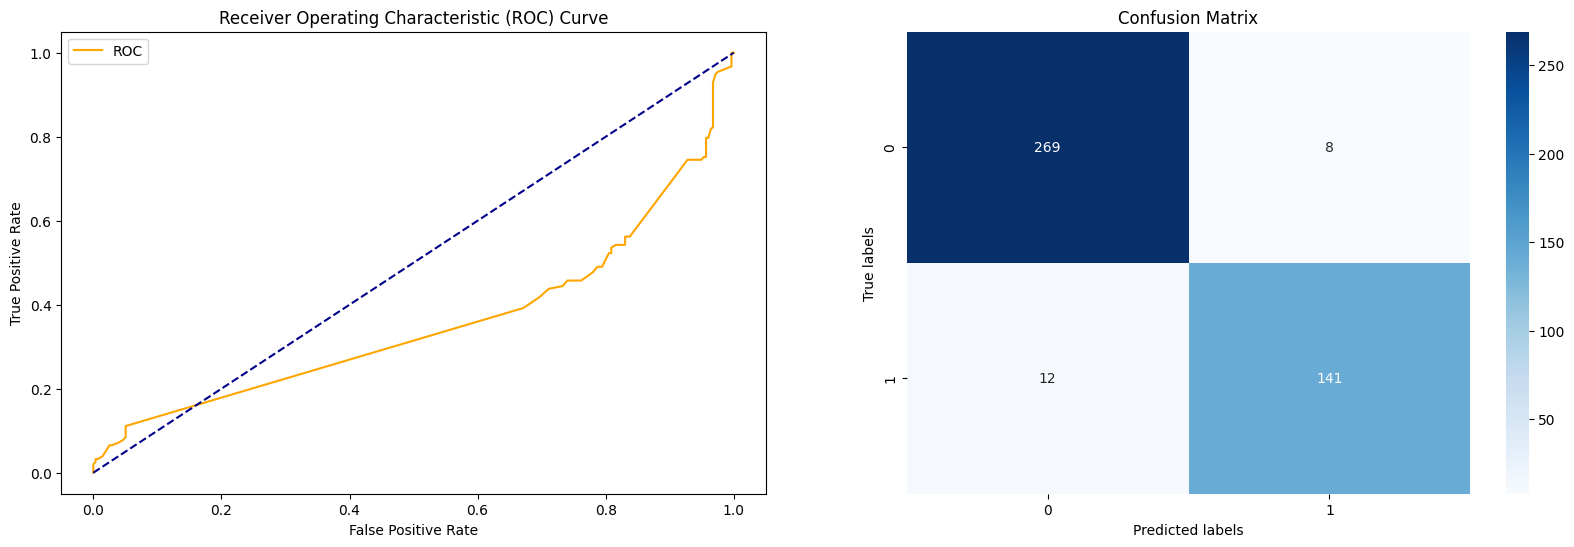

d:\important\2024\ML-zoomcamp-midterm\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       277
           1       0.95      0.92      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.95      0.95      0.95       430

Accuracy: 0.9534883720930233
Precision: 0.9463087248322147
Recall: 0.9215686274509803
F1 Score: 0.9337748344370861
ROC AUC Score: 0.9463438805124937


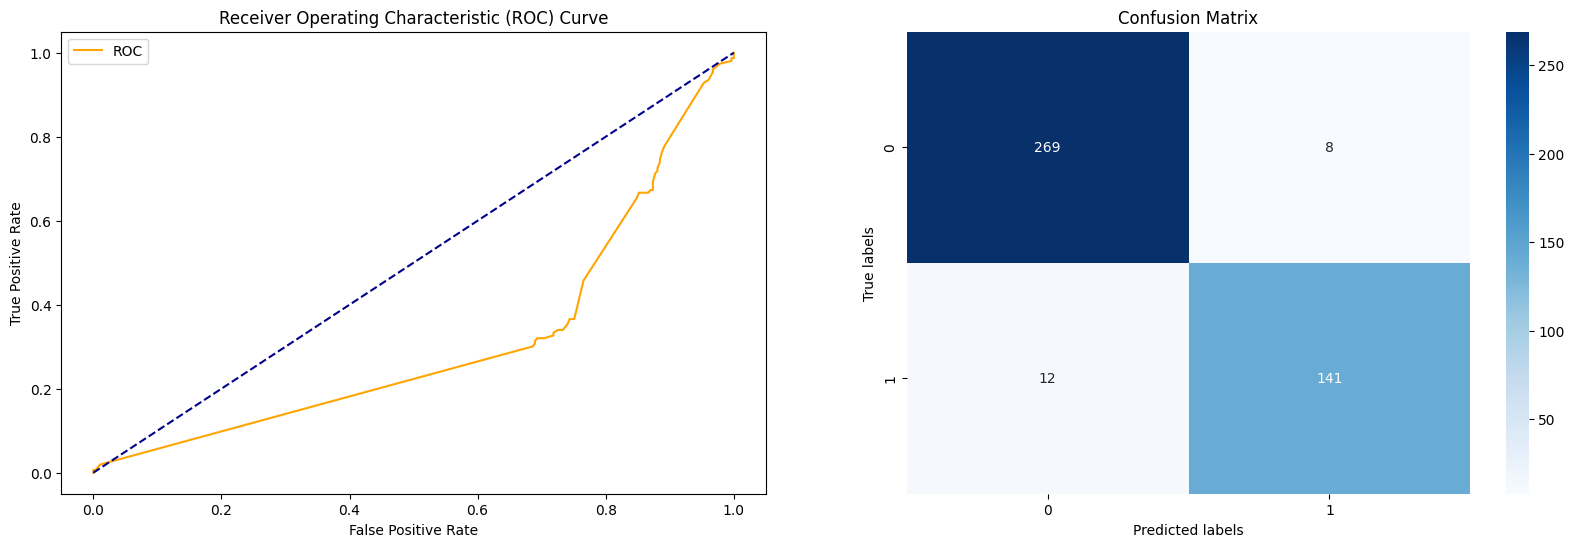

In [80]:
# Random Forest
rf_scaled = RandomForestClassifier(random_state=42)
acc, prec, rec, f1, roc_auc = model(X_train_scaled, y_train_resampled, X_test_scaled, y_test, rf_scaled)

rf_min_max = RandomForestClassifier(random_state=42)
acc, prec, rec, f1, roc_auc = model(X_train_min_max, y_train_resampled, X_test_min_max, y_test, rf_min_max)

result_df.loc[len(result_df)] = ['Random Forest Standard Scaled', acc, prec, rec, f1, roc_auc]
result_df.loc[len(result_df)] = ['Random Forest Min Max Scaled', acc, prec, rec, f1, roc_auc]

d:\important\2024\ML-zoomcamp-midterm\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       277
           1       0.91      0.94      0.92       153

    accuracy                           0.94       430
   macro avg       0.94      0.94      0.94       430
weighted avg       0.95      0.94      0.94       430

Accuracy: 0.9441860465116279
Precision: 0.9056603773584906
Recall: 0.9411764705882353
F1 Score: 0.9230769230769231
ROC AUC Score: 0.9435124230197495


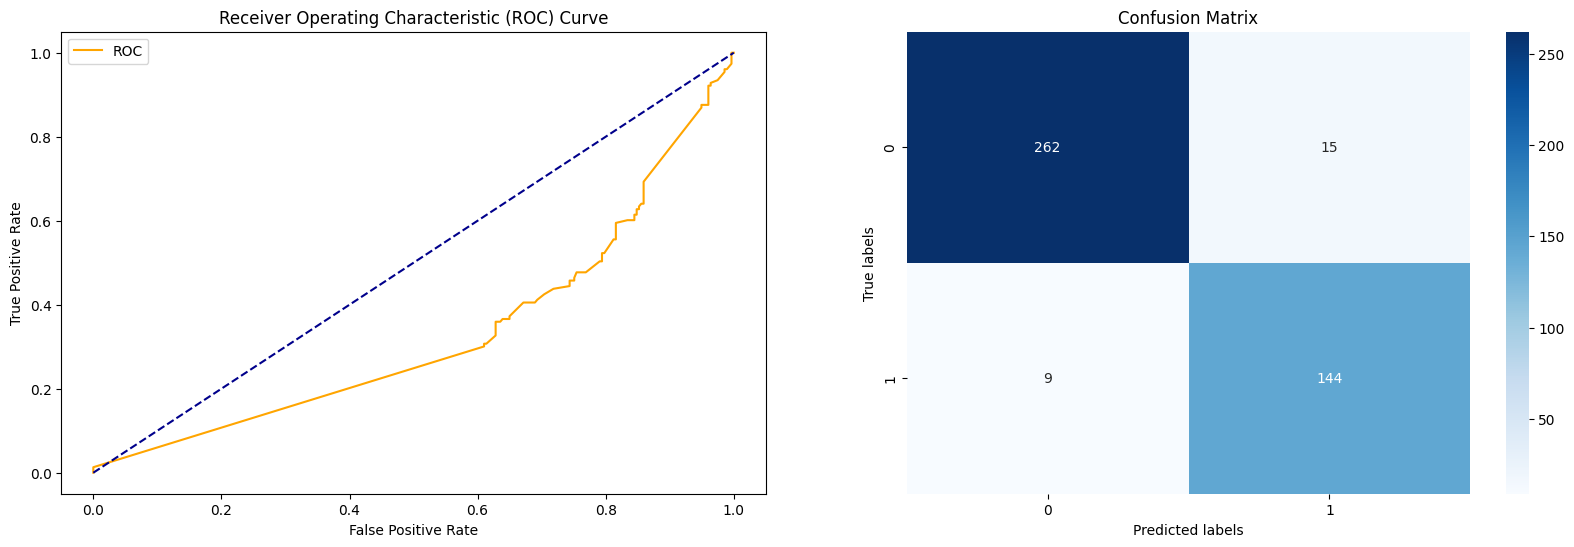

d:\important\2024\ML-zoomcamp-midterm\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       277
           1       0.91      0.94      0.92       153

    accuracy                           0.94       430
   macro avg       0.94      0.94      0.94       430
weighted avg       0.95      0.94      0.94       430

Accuracy: 0.9441860465116279
Precision: 0.9056603773584906
Recall: 0.9411764705882353
F1 Score: 0.9230769230769231
ROC AUC Score: 0.9435124230197495


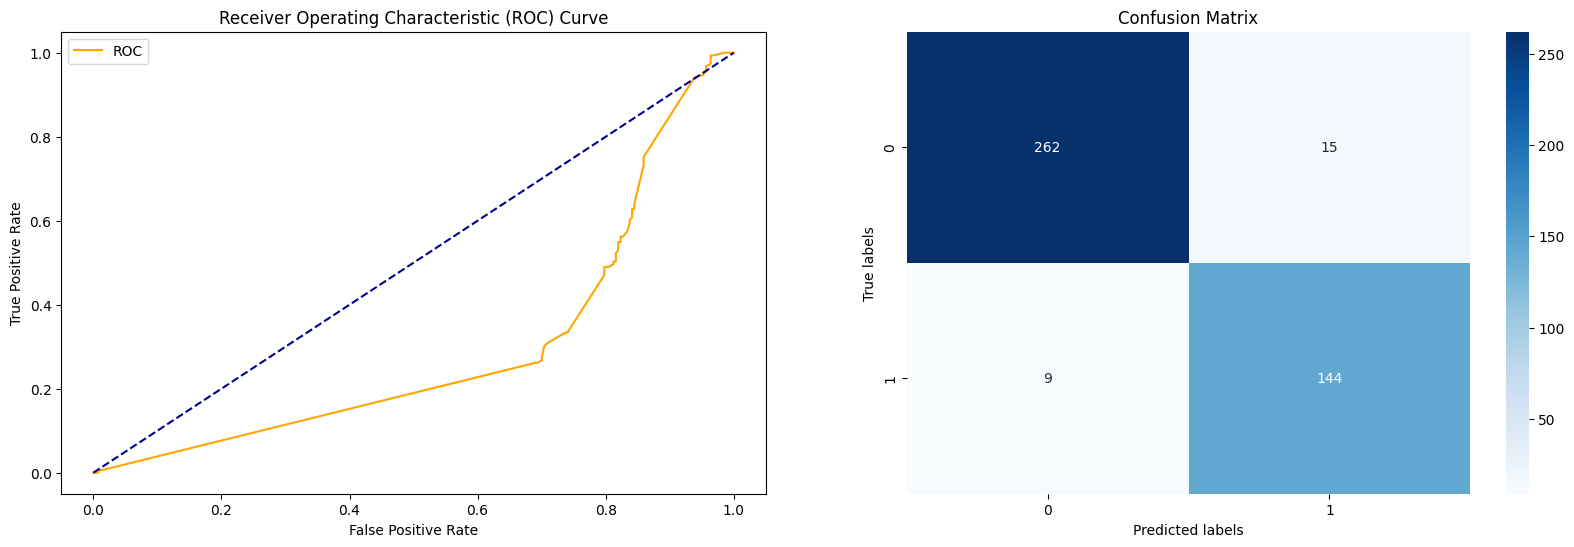

In [81]:
# Gradient Boosting
gb_scaled = GradientBoostingClassifier(random_state=42)
acc, prec, rec, f1, roc_auc = model(X_train_scaled, y_train_resampled, X_test_scaled, y_test, gb_scaled)

gb_min_max = GradientBoostingClassifier(random_state=42)
acc, prec, rec, f1, roc_auc = model(X_train_min_max, y_train_resampled, X_test_min_max, y_test, gb_min_max)

result_df.loc[len(result_df)] = ['Gradient Boosting Standard Scaled', acc, prec, rec, f1, roc_auc]
result_df.loc[len(result_df)] = ['Gradient Boosting Min Max Scaled', acc, prec, rec, f1, roc_auc]

d:\important\2024\ML-zoomcamp-midterm\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\important\2024\ML-zoomcamp-midterm\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       277
           1       0.81      0.93      0.87       153

    accuracy                           0.90       430
   macro avg       0.88      0.90      0.89       430
weighted avg       0.91      0.90      0.90       430

Accuracy: 0.8976744186046511
Precision: 0.8114285714285714
Recall: 0.9281045751633987
F1 Score: 0.8658536585365854
ROC AUC Score: 0.9044855005780892


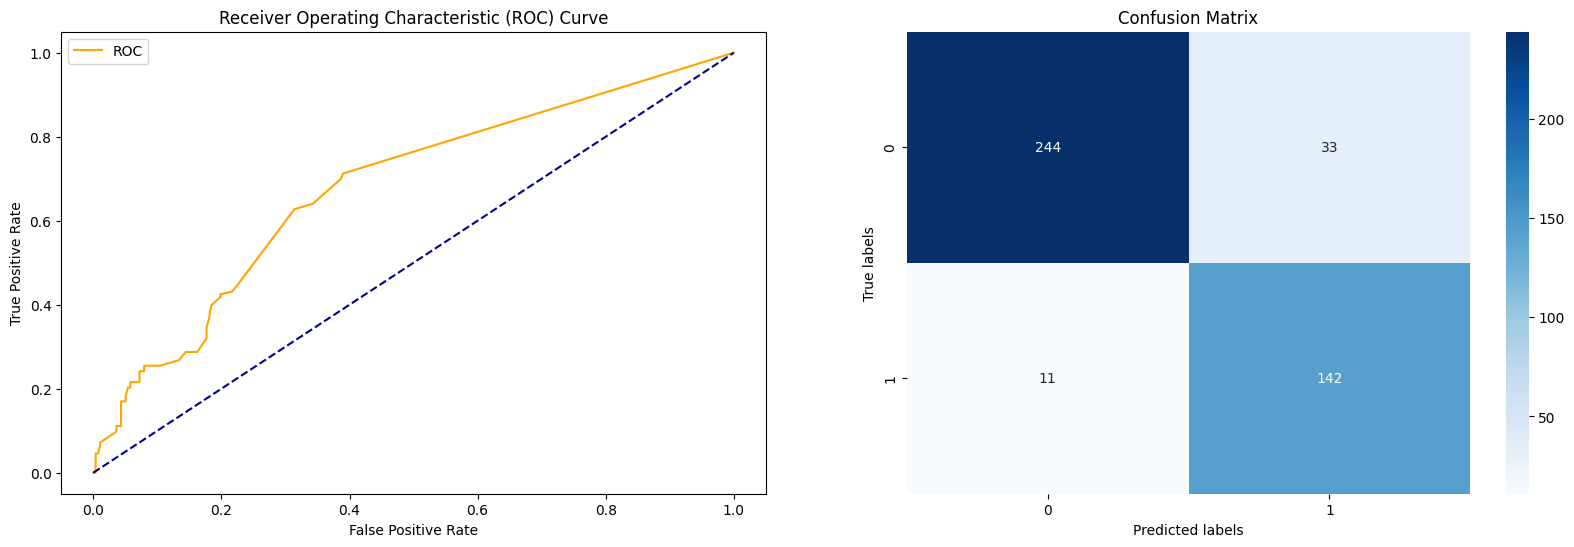

d:\important\2024\ML-zoomcamp-midterm\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\important\2024\ML-zoomcamp-midterm\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       277
           1       0.81      0.93      0.87       153

    accuracy                           0.90       430
   macro avg       0.88      0.90      0.89       430
weighted avg       0.91      0.90      0.90       430

Accuracy: 0.8976744186046511
Precision: 0.8114285714285714
Recall: 0.9281045751633987
F1 Score: 0.8658536585365854
ROC AUC Score: 0.9044855005780892


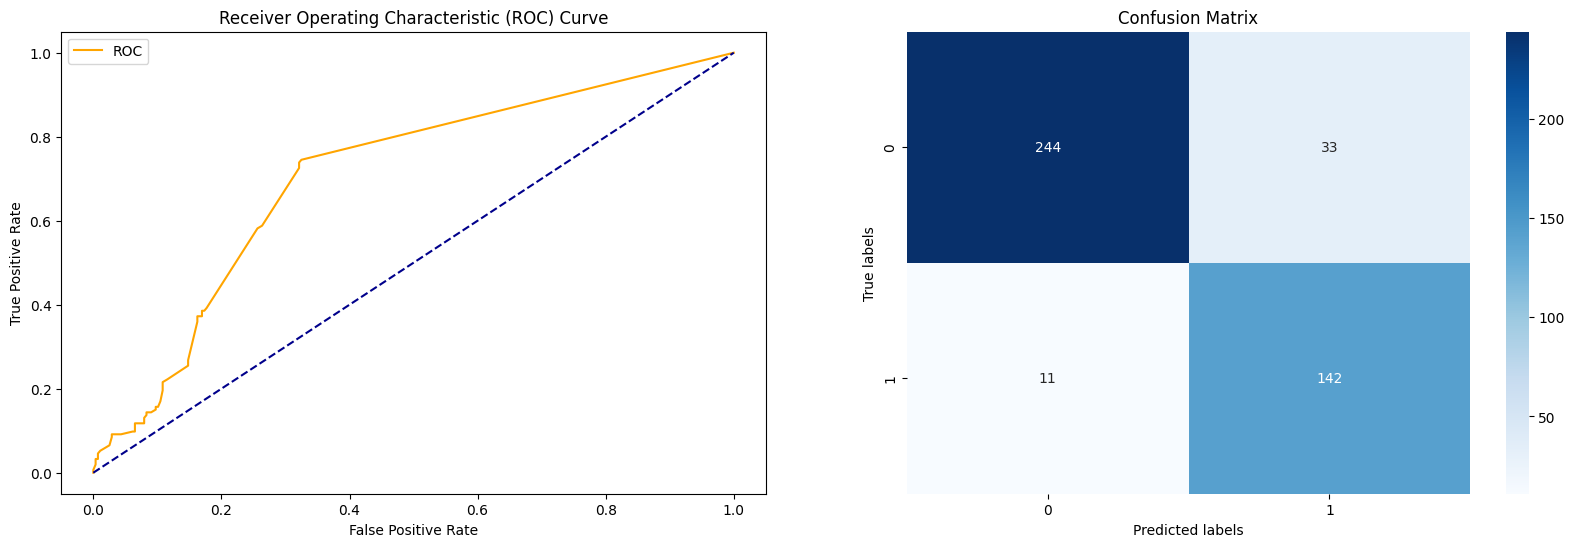

In [82]:
# AdaBoost
ab_scaled = AdaBoostClassifier(random_state=42)
acc, prec, rec, f1, roc_auc = model(X_train_scaled, y_train_resampled, X_test_scaled, y_test, ab_scaled)

ab_min_max = AdaBoostClassifier(random_state=42)
acc, prec, rec, f1, roc_auc = model(X_train_min_max, y_train_resampled, X_test_min_max, y_test, ab_min_max)

result_df.loc[len(result_df)] = ['AdaBoost Standard Scaled', acc, prec, rec, f1, roc_auc]
result_df.loc[len(result_df)] = ['AdaBoost Min Max Scaled', acc, prec, rec, f1, roc_auc]

In [83]:
# display results
result_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
3,Random Forest,0.953488,0.946309,0.921569,0.933775,0.946344
10,Random Forest Standard Scaled,0.953488,0.946309,0.921569,0.933775,0.946344
11,Random Forest Min Max Scaled,0.953488,0.946309,0.921569,0.933775,0.946344
4,Gradient Boosting,0.944186,0.905660,0.941176,0.923077,0.943512
12,Gradient Boosting Standard Scaled,0.944186,0.905660,0.941176,0.923077,0.943512
13,Gradient Boosting Min Max Scaled,0.944186,0.905660,0.941176,0.923077,0.943512
5,AdaBoost,0.897674,0.811429,0.928105,0.865854,0.904486
14,AdaBoost Standard Scaled,0.897674,0.811429,0.928105,0.865854,0.904486
15,AdaBoost Min Max Scaled,0.897674,0.811429,0.928105,0.865854,0.904486
2,Decision Tree,0.888372,0.818182,0.882353,0.849057,0.887025


In [84]:
# Pickle the model: I am choosing random forest as it has the highest accuracy, will pickle gradient boosting as well as adaboost to compare results later using UI
import pickle
filename = 'random_forest_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

filename = 'gradient_boosting_model.pkl'
pickle.dump(gb, open(filename, 'wb'))

filename = 'adaboost_model.pkl'
pickle.dump(ab, open(filename, 'wb'))

# Pickle the scaler
filename = 'standard_scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

In [85]:
# import the model
import pickle
model = pickle.load(open('random_forest_model.pkl', 'rb'))
# make a prediction
prediction = model.predict([[1, 1, 1, 1, 1]])
print(prediction)

[1]


d:\important\2024\ML-zoomcamp-midterm\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [87]:
# random forest grid search cv
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

print(grid_search.best_params_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 100}


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       277
           1       0.95      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430

Accuracy: 0.9558139534883721
Precision: 0.9527027027027027
Recall: 0.9215686274509803
F1 Score: 0.9368770764119602
ROC AUC Score: 0.9481489346641182


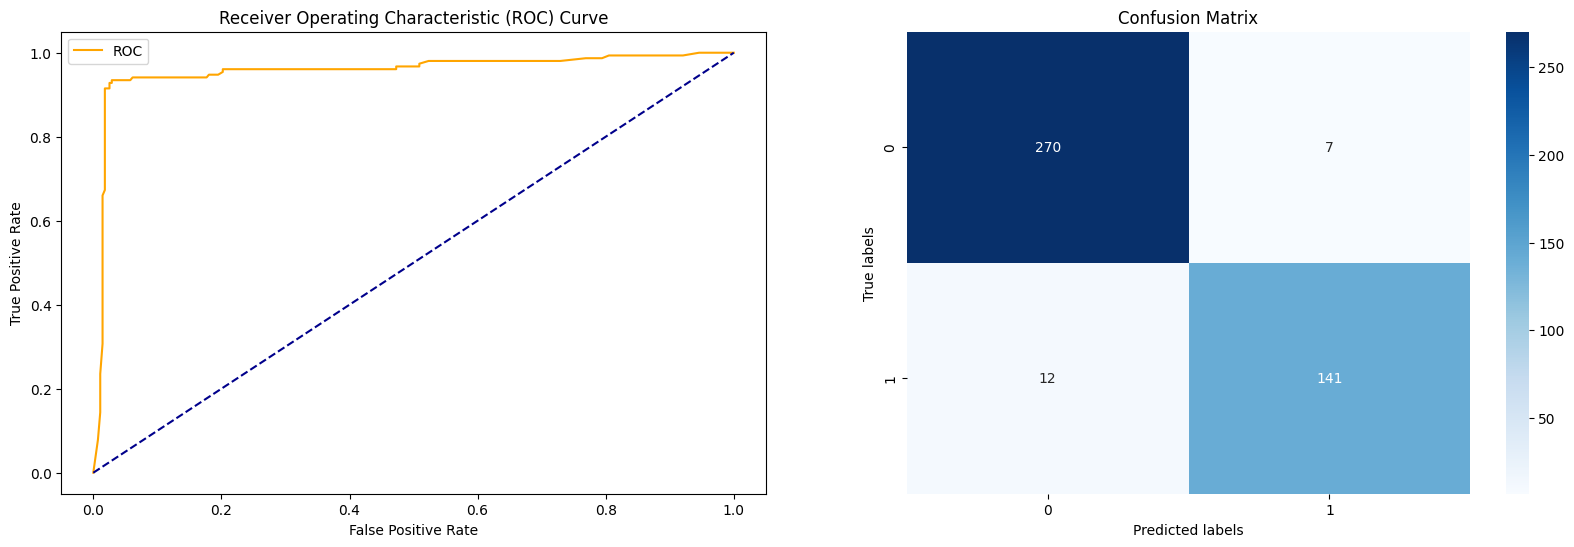

In [88]:
# fitting the model with best parameters
rf_best = RandomForestClassifier(random_state=42, n_estimators=300, max_features='sqrt', max_depth=50, criterion='entropy')
rf_best.fit(X_train_resampled, y_train_resampled)
y_pred = rf_best.predict(X_test)

acc, prec, rec, f1, roc_auc, fpr, tpr = metrics(y_test, y_pred, rf_best)
plot_curve_mat(fpr, tpr, y_test, y_pred)

In [89]:
# trying kfold training
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_best, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print('Cross Validation Scores:', scores)
print('Mean Accuracy:', scores.mean())

Cross Validation Scores: [0.93707865 0.96179775 0.92134831 0.8988764  0.91216216]
Mean Accuracy: 0.9262526571515336


In [90]:
# Pickle the model
filename = 'random_forest_best_model.pkl'
pickle.dump(rf_best, open(filename, 'wb'))